### DAY 10 – Data Understanding Through Grouping

***Today's Goal:*** Understand the business using groupby analysis
- This is how analysts start getting insights from data.

### Load Data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
merged_df = pd.read_csv('DATA/Processed_Data/processed_orders_customers.csv')
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,delivery_time_days,clean_delivery_time_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,8.0,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,13.0,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,9.0,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,13.0,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2.0,2.0


### Orders by Status

In [3]:
status_counts = merged_df['order_status'].value_counts()
status_counts

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

### Visualization

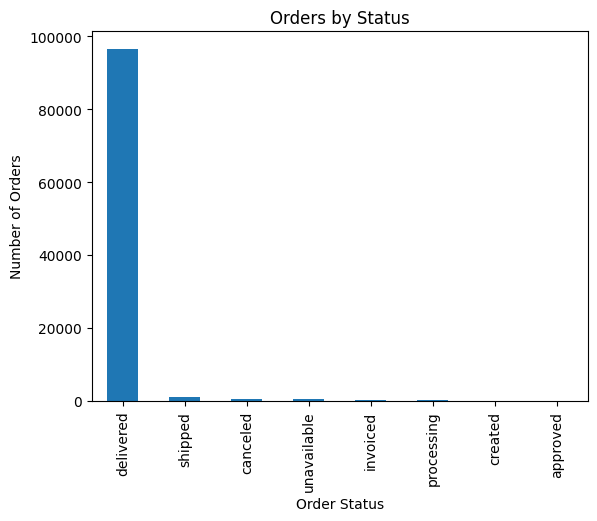

In [4]:
status_counts.plot(kind='bar')
plt.title("Orders by Status")
plt.xlabel("Order Status")
plt.ylabel("Number of Orders")
plt.show()

### Convert object column into datetime

In [5]:
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])

### Orders Per Month

In [6]:
merged_df['order_month'] = merged_df['order_purchase_timestamp'].dt.to_period('M')
orders_per_month = merged_df.groupby('order_month').size()
orders_per_month


order_month
2016-09       4
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, dtype: int64

### Plot Monthly Trend

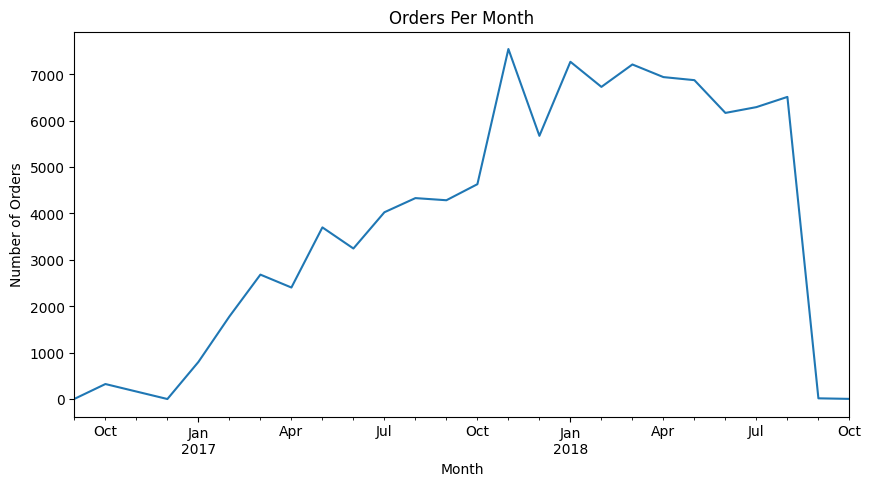

In [7]:
import matplotlib.pyplot as plt
orders_per_month.plot(figsize=(10,5))
plt.title("Orders Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()

### Orders Per Year

In [8]:
merged_df['order_year'] = merged_df['order_purchase_timestamp'].dt.year
orders_per_year = merged_df.groupby('order_year').size()
orders_per_year

order_year
2016      329
2017    45101
2018    54011
dtype: int64

### Average Delivery Time by Status (only delivered)

In [9]:
delivered_df = merged_df[merged_df['order_status'] == 'delivered'].copy()

In [10]:
avg_delivery_time = delivered_df['delivery_time_days'].mean()
avg_delivery_time

np.float64(12.093604229294082)

In [11]:
delivered_df['delivery_time_days'].describe()

count    96470.000000
mean        12.093604
std          9.551380
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_time_days, dtype: float64

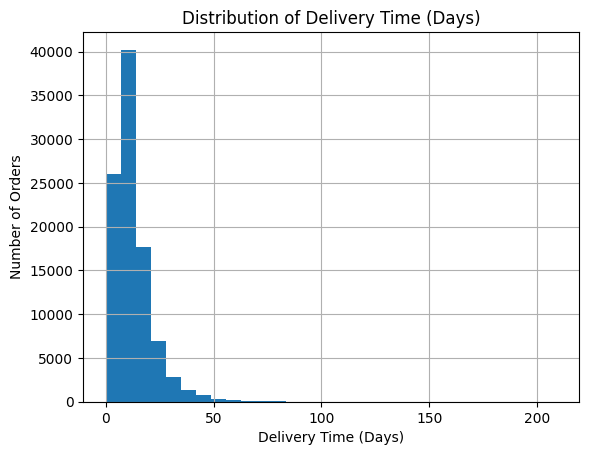

In [12]:
delivered_df['delivery_time_days'].hist(bins=30)
plt.title("Distribution of Delivery Time (Days)")
plt.xlabel("Delivery Time (Days)")
plt.ylabel("Number of Orders")
plt.show()

In [13]:
top_states = (merged_df.groupby('customer_state').size().sort_values(ascending=False).head(5))
top_states


customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
dtype: int64

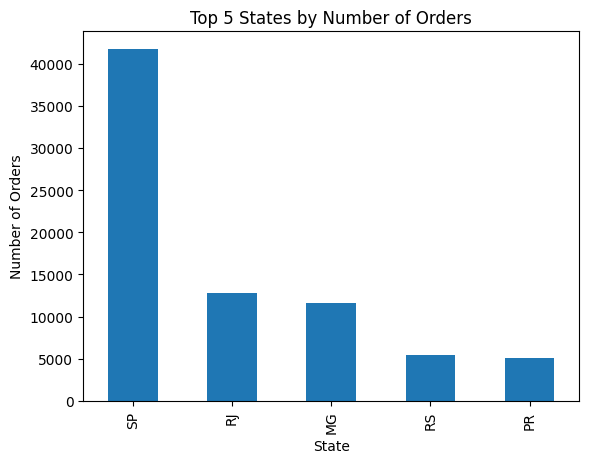

In [14]:
top_states.plot(kind='bar')
plt.title("Top 5 States by Number of Orders")
plt.xlabel("State")
plt.ylabel("Number of Orders")
plt.show()

#### Conclusion

- Analyzed orders based on status, time, and location
- Identified important patterns like most common order status and top customer states
- Used grouping to understand business trends instead of just looking at raw data
- This step helped move from data cleaning to business understanding


#### Learnings

- Groupby helps us summarize large data easily
- We can understand business performance using counts and averages
- Data can tell stories like which states order more or which status is highest
- Analysts use grouping to turn raw data into insights
